# HR Dataset

## Reference 

In [163]:
# https://www.kaggle.com/datasets/kadirduran/hr-dataset/data

## Import Libraries

In [164]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#  import labelencoder
from sklearn.preprocessing import LabelEncoder
# import confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report 

## Import Data

In [165]:
# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X1: satisfaction_level : It is employee satisfaction point, which ranges from 0-1.
# X2: last_evaluation : It is evaluated performance by the employer, which also ranges from 0-1.
# X3: number_projects : How many of projects assigned to an employee?
# X4: average_monthly_hours: How many hours in averega an employee worked in a month?
# X5: time_spent_company : time_spent_company means employee experience. The number of years spent by an employee in the company.
# X6: work_accident : Whether an employee has had a work accident or not.
# X7: promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
# X8: Departments : Employee's working department/division.
# X9: Salary : Salary level of the employee such as low, medium and high.
#  y: left : Whether the employee has left the company or not.


path1 = 'https://raw.githubusercontent.com/notfakearcher/yanjun/main/02_data/HR_Dataset.csv'
hr = pd.read_csv(path1)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [166]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [167]:
# missing data for each columns
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [168]:
cond = hr.columns != 'left'
x_col = hr.columns[cond]

In [169]:
# change the columns name 
x_col = ['x' + str(i) for i in range(len(x_col))]


In [170]:
# rename the columns
temp_col = hr.columns.values
temp_col[cond] = x_col
temp_col[~cond] = 'y'
temp_col
hr.columns = temp_col
hr.head()


,x0,x1,x2,x3,x4,x5,y,x6,x7,x8
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Choose the model to predict labels

In [171]:
# split the target form variables
target = hr.y
cond = hr.columns != 'y'
X = hr.loc[:,cond]
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [172]:
# transform object columns to lables
le = LabelEncoder()
new_col = X.select_dtypes('object').columns 
X[new_col] = X.select_dtypes('object').apply(le.fit_transform)
X.head()
# hr.info()

C:\Users\julia\AppData\Local\Temp\ipykernel_13728\2833476512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[new_col] = X.select_dtypes('object').apply(le.fit_transform)


,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [173]:
# split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.4)
model = DecisionTreeClassifier(
  criterion = 'gini',
  max_depth = 4
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [174]:
# calculate the predict labels
y_pred = model.predict(X_test)

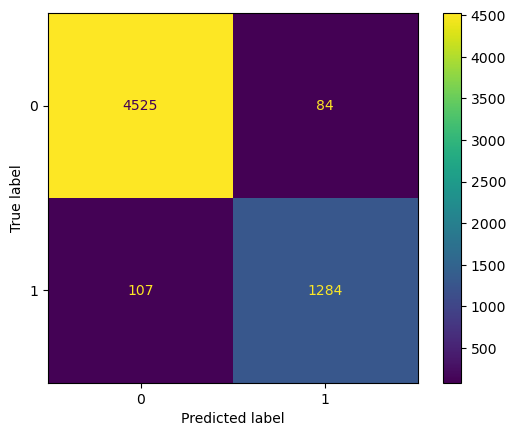

In [175]:
# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred, labels = model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
dis.plot()
plt.show()


In [177]:
# calcualte the accuracy
print(classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4609
           1       0.94      0.92      0.93      1391

    accuracy                           0.97      6000
   macro avg       0.96      0.95      0.96      6000
weighted avg       0.97      0.97      0.97      6000

